In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

#Import Libraries
import tensorflow as tf
import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time

import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

from sklearn.metrics import recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from models import save_model, generate_model_CNN, plot_performance
from generators import generator, decode

/Users/astasik/anaconda3/envs/machine/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
save_dir = 'plots'
if not os.path.exists(save_dir):
        os.makedirs(save_dir)

X_train = np.load('../data/X_train.npy')
Y_train = np.load('../data/y_train.npy')


X_val = np.load('../data/processed_data/m4021_session1/X.npy')
Y_val = np.load('../data/processed_data/m4021_session1/y_all.npy')

In [3]:
batch_size = 500
time_window = 500
n_dim = 1
predict_early = 0

input_shape = (time_window, n_dim)

In [4]:
train_generator = generator(X_train, Y_train, batch_size, time_window)
validate_generator = generator(X_val, Y_val, batch_size, time_window)

In [5]:
model = generate_model_CNN(input_shape)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 20)           160       
_________________________________________________________________
average_pooling1d_1 (Average (None, 250, 20)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 250, 20)           80        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 250, 20)           2820      
_________________________________________________________________
average_pooling1d_2 (Average (None, 125, 20)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 20)           80        
__________

In [6]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=150, 
                              verbose=1,
                              validation_data=validate_generator,
                              validation_steps=10,
                              )

save_model(model, name=predict_early)

Epoch 1/150
10/10 [==============================] - 10s 989ms/step - loss: 0.6543 - acc: 0.6982 - val_loss: 0.6937 - val_acc: 0.6856
Epoch 2/150
10/10 [==============================] - 5s 546ms/step - loss: 0.4697 - acc: 0.7782 - val_loss: 1.7694 - val_acc: 0.6612
Epoch 3/150
10/10 [==============================] - 6s 578ms/step - loss: 0.4674 - acc: 0.7856 - val_loss: 2.2751 - val_acc: 0.6620
Epoch 4/150
10/10 [==============================] - 7s 661ms/step - loss: 0.4284 - acc: 0.8044 - val_loss: 2.4408 - val_acc: 0.6720
Epoch 5/150
10/10 [==============================] - 6s 596ms/step - loss: 0.4186 - acc: 0.8034 - val_loss: 2.3815 - val_acc: 0.6568
Epoch 6/150
10/10 [==============================] - 6s 621ms/step - loss: 0.4078 - acc: 0.8068 - val_loss: 0.8275 - val_acc: 0.7094
Epoch 7/150
10/10 [==============================] - 5s 531ms/step - loss: 0.3962 - acc: 0.8102 - val_loss: 1.1150 - val_acc: 0.6572
Epoch 8/150
10/10 [==============================] - 5s 545ms/step -

10/10 [==============================] - 5s 494ms/step - loss: 0.0489 - acc: 0.9818 - val_loss: 0.2837 - val_acc: 0.9156
Epoch 63/150
10/10 [==============================] - 5s 502ms/step - loss: 0.0434 - acc: 0.9830 - val_loss: 0.1688 - val_acc: 0.9396
Epoch 64/150
10/10 [==============================] - 5s 501ms/step - loss: 0.0436 - acc: 0.9848 - val_loss: 0.2240 - val_acc: 0.9252
Epoch 65/150
10/10 [==============================] - 5s 483ms/step - loss: 0.0474 - acc: 0.9832 - val_loss: 0.3175 - val_acc: 0.9056
Epoch 66/150
10/10 [==============================] - 5s 508ms/step - loss: 0.0397 - acc: 0.9850 - val_loss: 0.3212 - val_acc: 0.8986
Epoch 67/150
10/10 [==============================] - 5s 485ms/step - loss: 0.0295 - acc: 0.9900 - val_loss: 0.0914 - val_acc: 0.9690
Epoch 68/150
10/10 [==============================] - 5s 501ms/step - loss: 0.0396 - acc: 0.9852 - val_loss: 0.3085 - val_acc: 0.9020
Epoch 69/150
10/10 [==============================] - 5s 482ms/step - loss:

10/10 [==============================] - 5s 491ms/step - loss: 0.0163 - acc: 0.9944 - val_loss: 0.1650 - val_acc: 0.9390
Epoch 124/150
10/10 [==============================] - 5s 509ms/step - loss: 0.0189 - acc: 0.9926 - val_loss: 0.0618 - val_acc: 0.9772
Epoch 125/150
10/10 [==============================] - 5s 489ms/step - loss: 0.0198 - acc: 0.9934 - val_loss: 0.5077 - val_acc: 0.8912
Epoch 126/150
10/10 [==============================] - 5s 496ms/step - loss: 0.0211 - acc: 0.9920 - val_loss: 0.0611 - val_acc: 0.9766
Epoch 127/150
10/10 [==============================] - 5s 482ms/step - loss: 0.0176 - acc: 0.9944 - val_loss: 0.0748 - val_acc: 0.9726
Epoch 128/150
10/10 [==============================] - 5s 502ms/step - loss: 0.0208 - acc: 0.9920 - val_loss: 0.1017 - val_acc: 0.9622
Epoch 129/150
10/10 [==============================] - 5s 493ms/step - loss: 0.0156 - acc: 0.9940 - val_loss: 1.5307 - val_acc: 0.7010
Epoch 130/150
10/10 [==============================] - 5s 498ms/step 

<IPython.core.display.Javascript object>


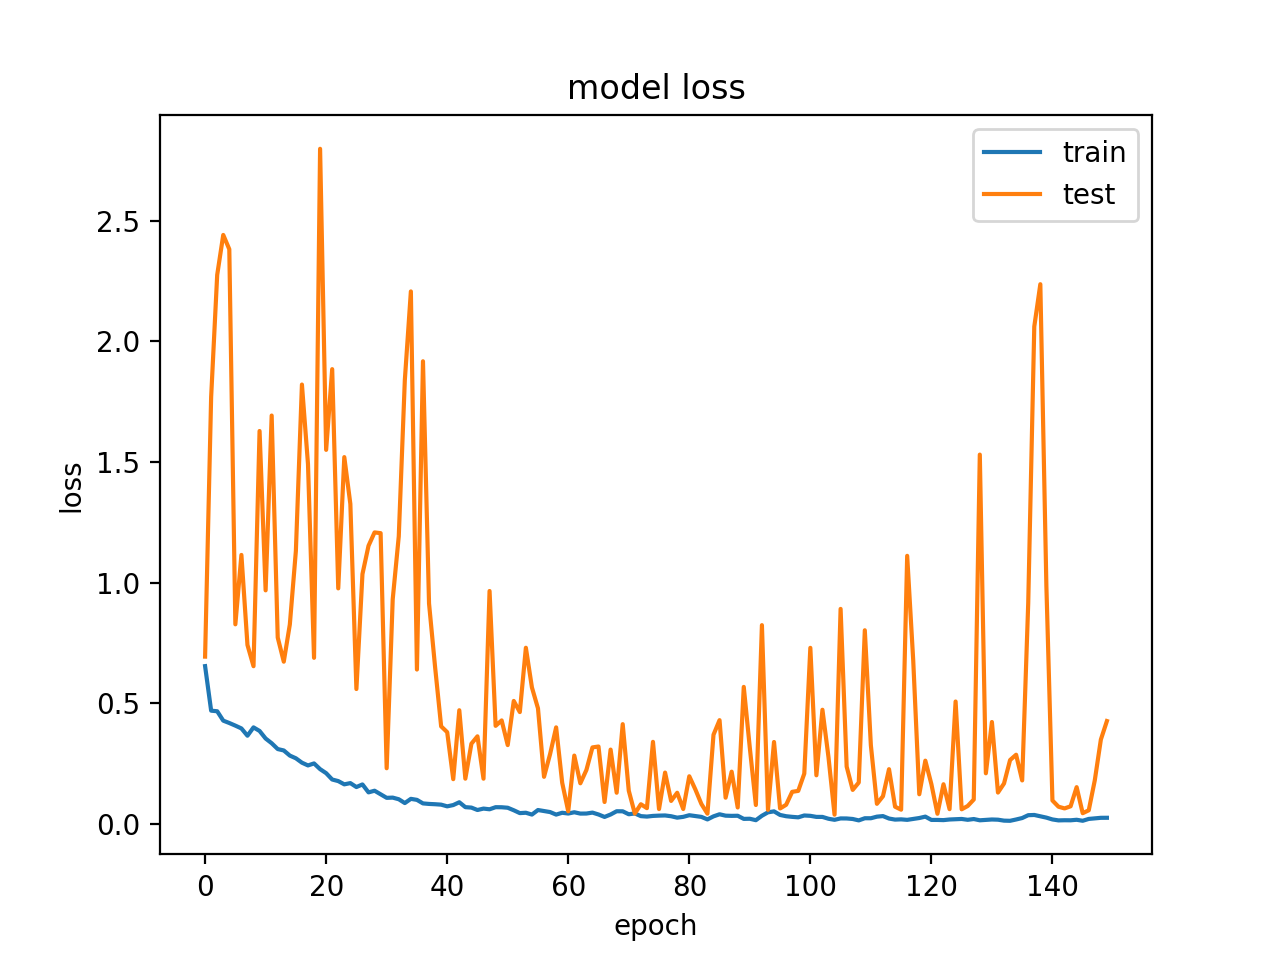

<IPython.core.display.Javascript object>


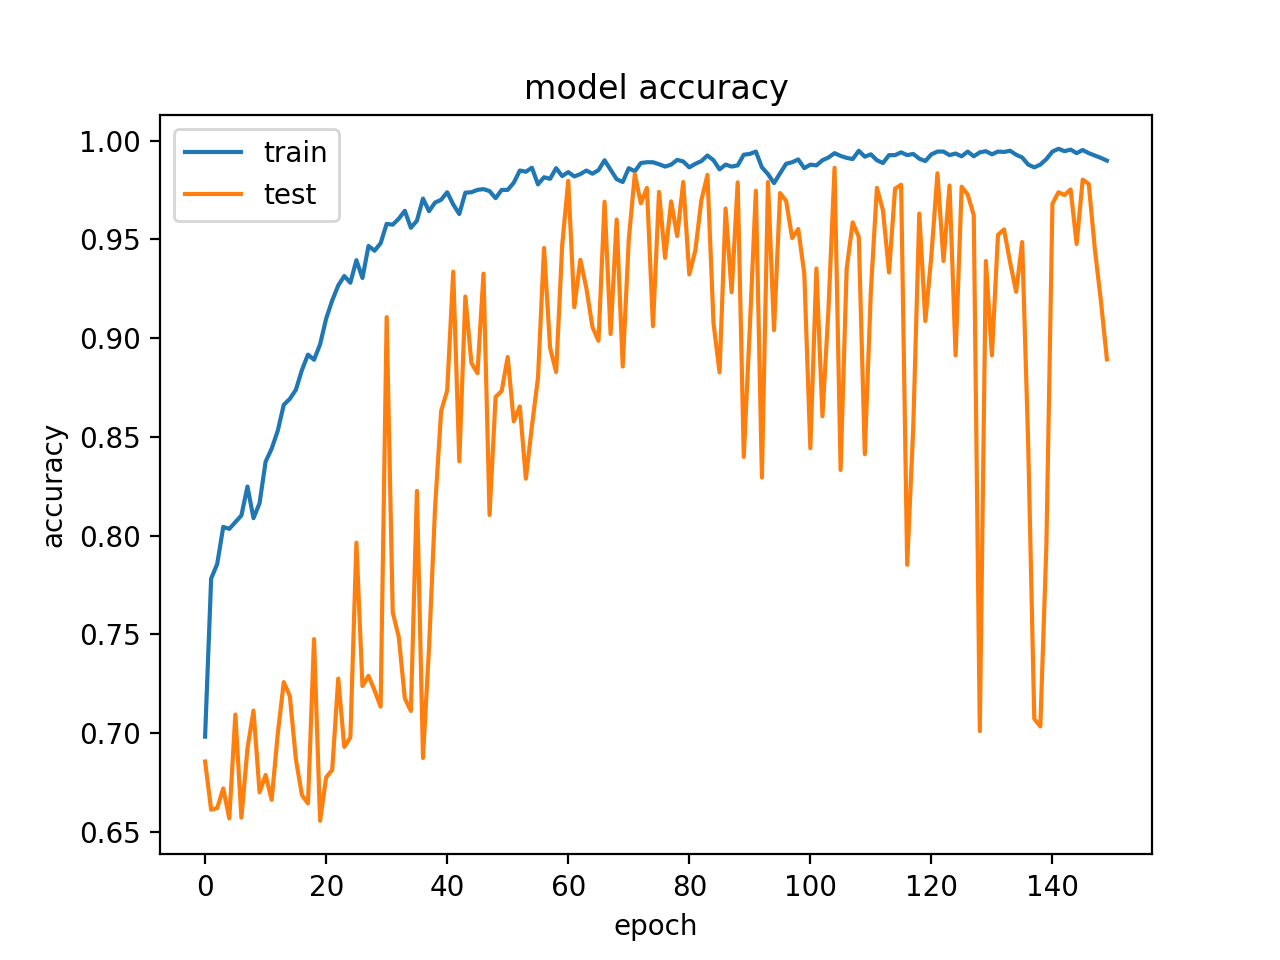

In [7]:
plot_performance(history)